In [2]:
import networkx as nx
import random
from networkx.algorithms import bipartite
import matplotlib.pylab as plt
%matplotlib inline
G = nx.complete_bipartite_graph(30, 50)
u, v = nx.bipartite.sets(G)
u = list(u)
v = list(v)


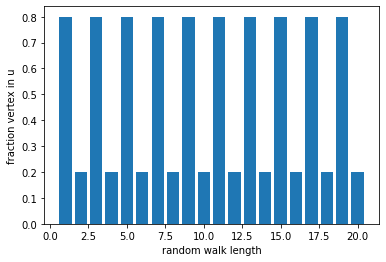

In [6]:
du = {}
dv = {}
for i in range(1,1001):
    startVertex = 0
    if random.choice([1,2,3,4])==1:
        startVertex = random.choice(list(u))
    else:
        startVertex = random.choice(list(v))    
    for t in range(1,21):
        if startVertex in u:
            startVertex = random.choice(list(v))
            dv[t] = dv.get(t,0)+1
        else:
            startVertex = random.choice(list(u))
            du[t] = du.get(t,0)+1
x = list(range(1,21))
y=[]
for i in range(1,21):
    y.append(round(du.get(i,0)/1000,1))
plt.bar(x,y,align='center')
plt.xlabel('random walk length')
plt.ylabel("fraction vertex in u")
plt.show()
            
            

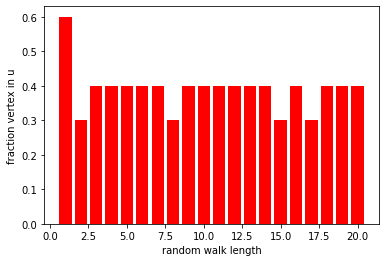

In [7]:
du = {}
dv = {}
for i in range(1,1001):
    startVertex = 0
    if random.choice([1,2,3,4])==1:
        startVertex = random.choice(list(u))
    else:
        startVertex = random.choice(list(v))    
    for t in range(1,21):
        if startVertex in u:
            if random.choice([1,2,3,4])!=1:    
                startVertex = random.choice(list(v))
                dv[t] = dv.get(t,0)+1
        else:
            if random.choice([1,2,3,4])!=1:
                startVertex = random.choice(list(u))
                du[t] = du.get(t,0)+1
x = list(range(1,21))
y=[]
for i in range(1,21):
    y.append(round(du.get(i,0)/1000,1))
plt.bar(x,y,align='center',color='r')
plt.xlabel('random walk length')
plt.ylabel("fraction vertex in u")
plt.show()

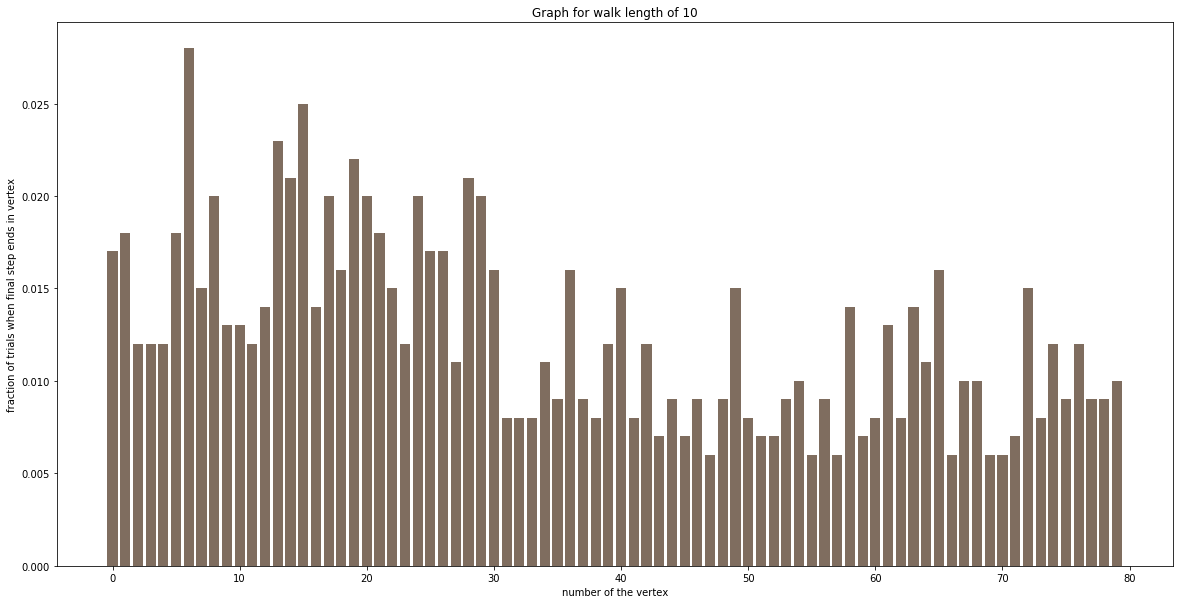

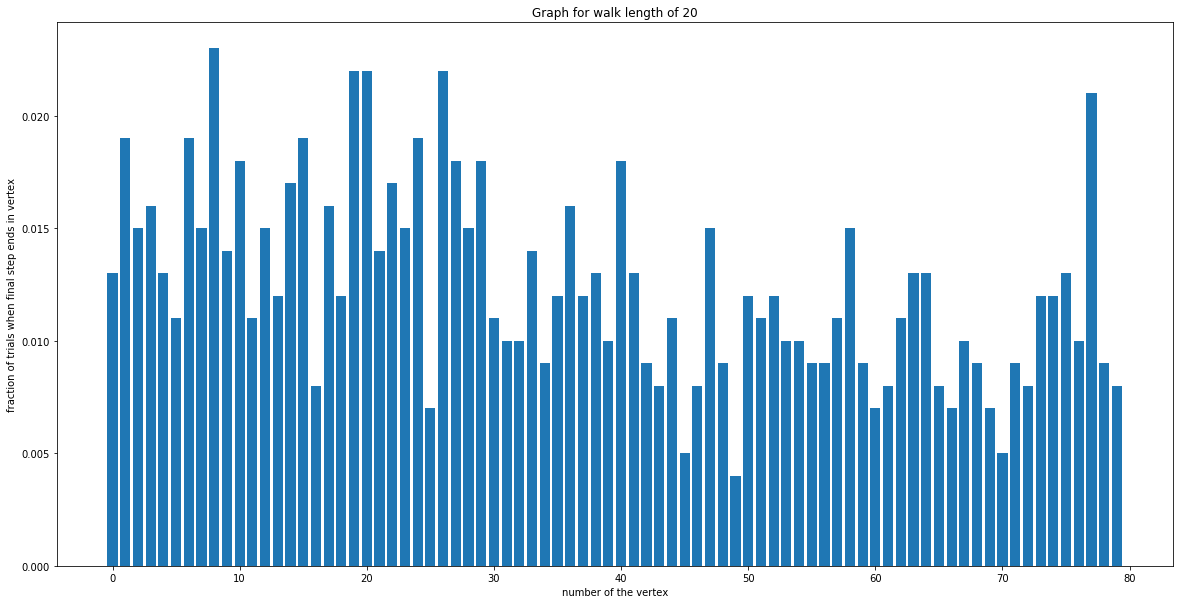

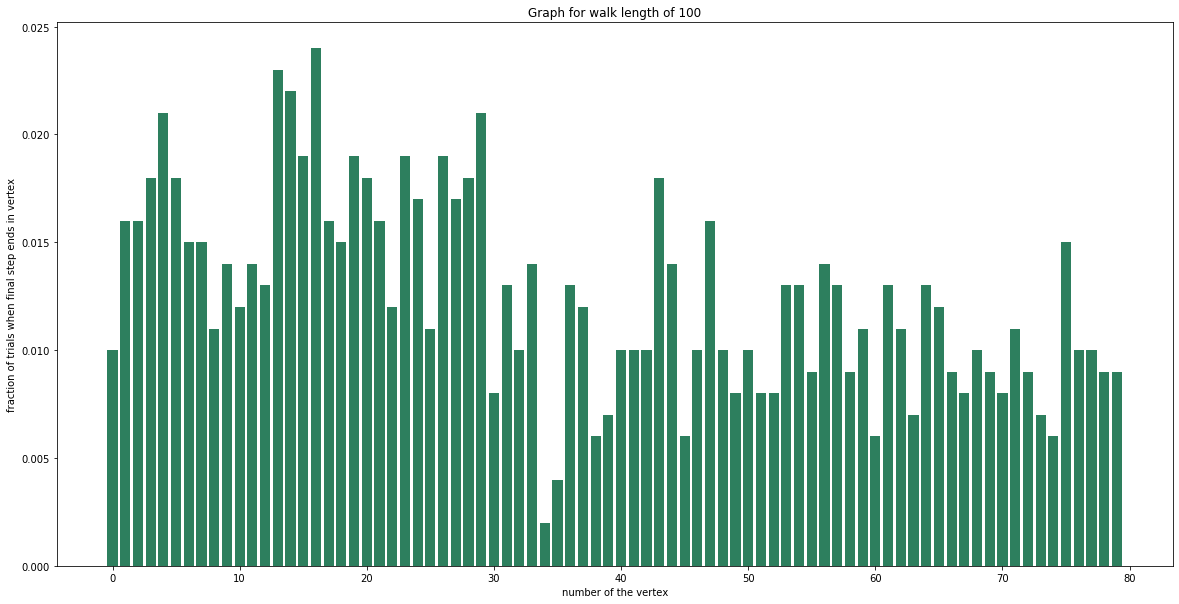

In [11]:
d20 ={}
d10 = {}
d100 ={}
for i in range(1,1001):
    startVertex = 0
    if random.choice([1,2,3,4])==1:
        startVertex = random.choice(list(u))
    else:
        startVertex = random.choice(list(v))    
    for t in range(1,21):
        if startVertex in u:
            if random.choice([1,2,3,4])!=1:    
                startVertex = random.choice(list(v))
                dv[t] = dv.get(t,0)+1
        else:
            if random.choice([1,2,3,4])!=1:
                startVertex = random.choice(list(u))
                du[t] = du.get(t,0)+1
        if t==20:
            d20[startVertex] = d20.get(startVertex,0)+1
for i in range(1,1001):
    startVertex = 0
    if random.choice([1,2,3,4])==1:
        startVertex = random.choice(list(u))
    else:
        startVertex = random.choice(list(v))    
    for t in range(1,11):
        if startVertex in u:
            if random.choice([1,2,3,4])!=1:    
                startVertex = random.choice(list(v))
                dv[t] = dv.get(t,0)+1
        else:
            if random.choice([1,2,3,4])!=1:
                startVertex = random.choice(list(u))
                du[t] = du.get(t,0)+1
        if t==10:
            d10[startVertex] = d10.get(startVertex,0)+1

for i in range(1,1001):
    startVertex = 0
    if random.choice([1,2,3,4])==1:
        startVertex = random.choice(list(u))
    else:
        startVertex = random.choice(list(v))    
    for t in range(1,101):
        if startVertex in u:
            if random.choice([1,2,3,4])!=1:    
                startVertex = random.choice(list(v))
                dv[t] = dv.get(t,0)+1
        else:
            if random.choice([1,2,3,4])!=1:
                startVertex = random.choice(list(u))
                du[t] = du.get(t,0)+1
        if t==100:
            d100[startVertex] = d100.get(startVertex,0)+1
x1 = [i for i in range(0,80)]
y1 = []
y2 = []
y3 = []

for i in range(0,80):
     y2.append(d10.get(i,0)/1000)
plt.figure(figsize=(20,10))
plt.bar(x1,y2,align='center',color="#7f6d5f")
plt.title("Graph for walk length of 10")
plt.xlabel("number of the vertex")
plt.ylabel("fraction of trials when final step ends in vertex")
plt.show()

for i in x1:
    y1.append(d20.get(i,0)/1000)
plt.figure(figsize=(20,10))
plt.bar(x1,y1,align='center')
plt.title("Graph for walk length of 20")
plt.xlabel("number of the vertex")
plt.ylabel("fraction of trials when final step ends in vertex")
plt.show()

for i in range(0,80):
     y3.append(d100.get(i,0)/1000)
plt.figure(figsize=(20,10))
plt.bar(x1,y3,align="center",color="#2d7f5e")
plt.title("Graph for walk length of 100")
plt.xlabel("number of the vertex")
plt.ylabel("fraction of trials when final step ends in vertex")
plt.show()

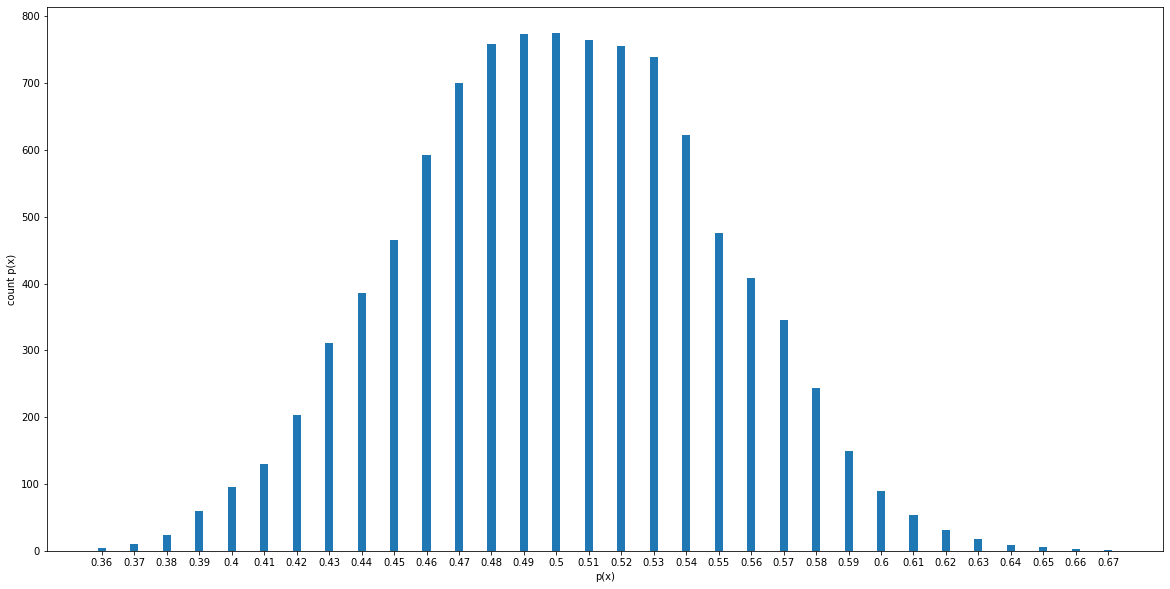

In [35]:
import numpy as np
import math
d = {}
def return_set_bits(state):
    return state.count(1)
n = 100
u = []
for i in range(0,n):
    u.append(random.choice([0,1]))
trials = 10000
for i in range(trials):
    neighbours = []
    for j in range(0,n):
        neighbour = u[:]
        if u[j]==1:
            neighbour[j] = 0
        else:
            neighbour[j] = 1
        neighbours.append(neighbour)
    v = random.choice(neighbours)
    p_u = return_set_bits(u)/n
    p_v = return_set_bits(v)/n
    
    f_u = p_u*math.log(1/p_u,2) + (1-p_u)*math.log(1/(1-p_u),2)
    f_v = p_v*math.log(1/p_v,2) + (1-p_v)*math.log(1/(1-p_v),2)
    
    if f_v>=f_u:
        u = v[:]
    elif np.random.uniform()<=(f_u/f_v):
        u = v[:]
    d[p_u] = d.get(p_u,0)+1


x = list(d.keys())
x.sort()
y = []
for i in x:
    y.append(d[i])
for i in range(0,len(x)):
    x[i] = str(x[i])
plt.figure(figsize=(20,10))
plt.bar(x,y,width=0.25)
plt.ylabel("count p(x)")
plt.xlabel("p(x)")
plt.show()
    
        
        